Final Project - Heart Disease Prediction using UCI heart disease dataset

**A)   Data Analysis**

In [0]:
import pandas as pd

data = pd.read_csv("/content/heart.csv")

In [0]:
data.shape

(303, 14)

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**B)  Data Visualization**

In [0]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
target = list(data['target'].values)
age = list(data['age'].values)


In [0]:
not_having_heart_disease,having_heart_disease,age_not_have,age_have = 0,0,0,0
for i in range(len(target)):
  if target[i] == 0:
    not_having_heart_disease+=1
  else :
    having_heart_disease+=1



In [0]:
l = []
labelx = ['Not_having_heart_disease','having_heart_disease']
print(having_heart_disease)
print(not_having_heart_disease)
l.append(not_having_heart_disease)
l.append(having_heart_disease)


165
138


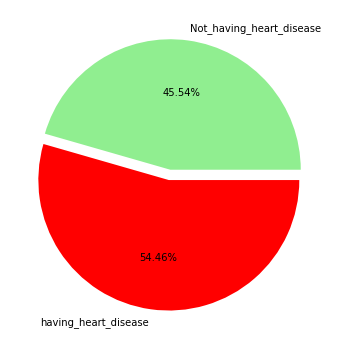

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
colors = [ 'lightgreen','red',]
explode = [0,0.08]
plt.pie(l,labels=labelx,explode=explode,colors = colors,startangle=0,autopct='%.2f%%')
plt.show()

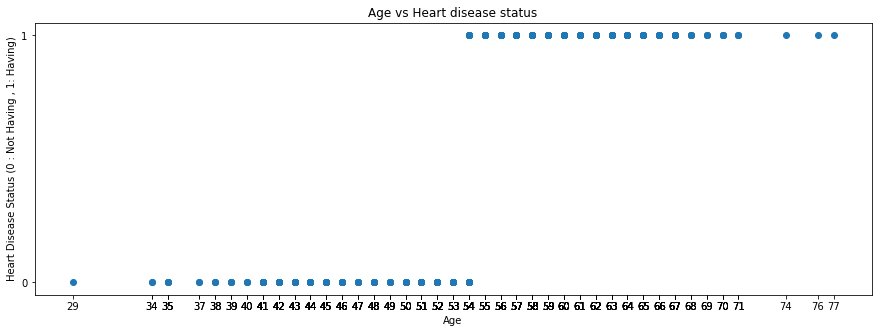

In [0]:
plt.figure(figsize=(15,5))

plt.scatter(age,target)
plt.yticks([0,1])
plt.xticks(age)
plt.title("Age vs Heart disease status")
plt.xlabel("Age")
plt.ylabel('Heart Disease Status (0 : Not Having , 1: Having)')
plt.show()


In [0]:

correlation_matrix = data.corr()

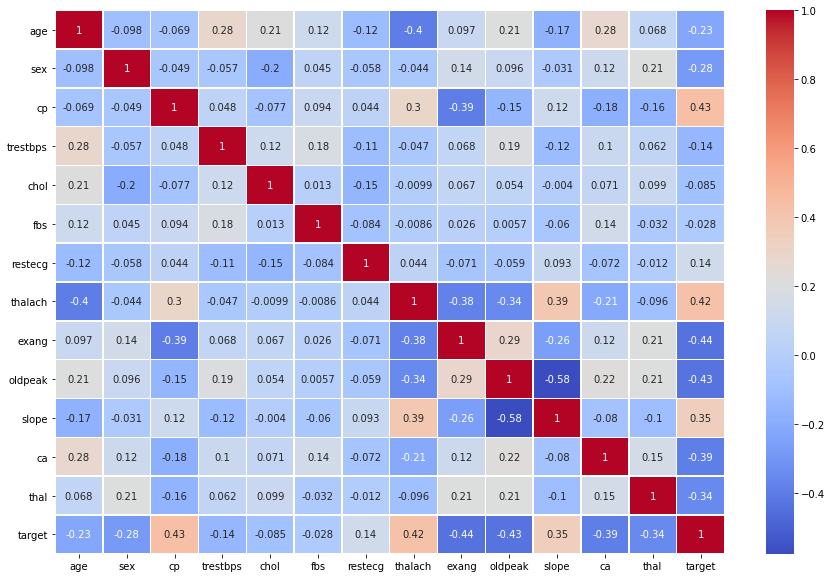

In [0]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 10)) 
heatmap = sns.heatmap(correlation_matrix,linewidths = .5,cmap="coolwarm",annot=True)

**C) Logistic Regression**

In [0]:
x = data.iloc[:,:-1]

y = data.iloc[:,-1:]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state = 0)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [0]:
lor = LogisticRegression(max_iter=900)


In [0]:
lor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lor.predict(x_test)


In [0]:
score = accuracy_score(y_pred,y_test)
print(score)

0.8131868131868132


In [0]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Accuracy Score: {0}".format(score), size=15)

In [0]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[32, 12],
       [ 5, 42]])

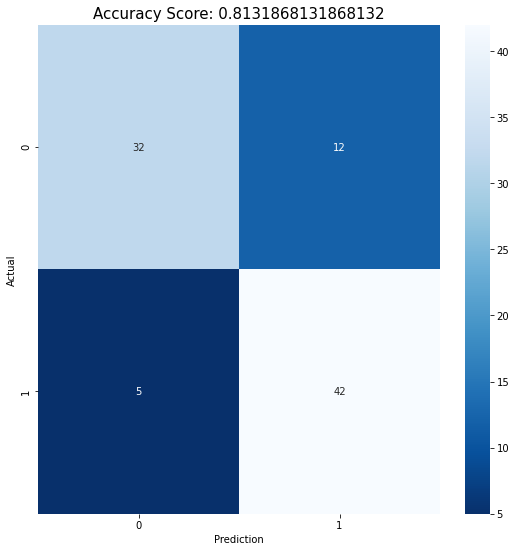

In [0]:
print_heatmap(cm, score)

**D)                     Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier(max_depth=10)
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dtree_y_pred = dtree.predict(x_test)


In [0]:
dtree_accuracy_score = accuracy_score(y_test,dtree_y_pred)

dtree_accuracy_score

0.7252747252747253

In [0]:
cf_dtree = confusion_matrix(y_test, dtree_y_pred)
cf_dtree

array([[32, 12],
       [13, 34]])

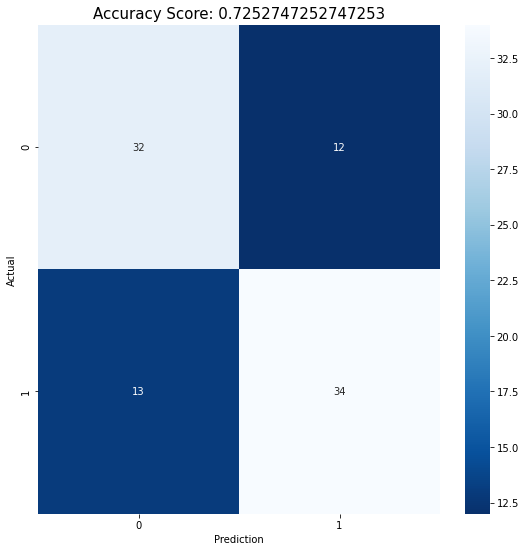

In [0]:
print_heatmap(cf_dtree,dtree_accuracy_score)

In [0]:

import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None,filled=True, rounded=True,special_characters=True) 


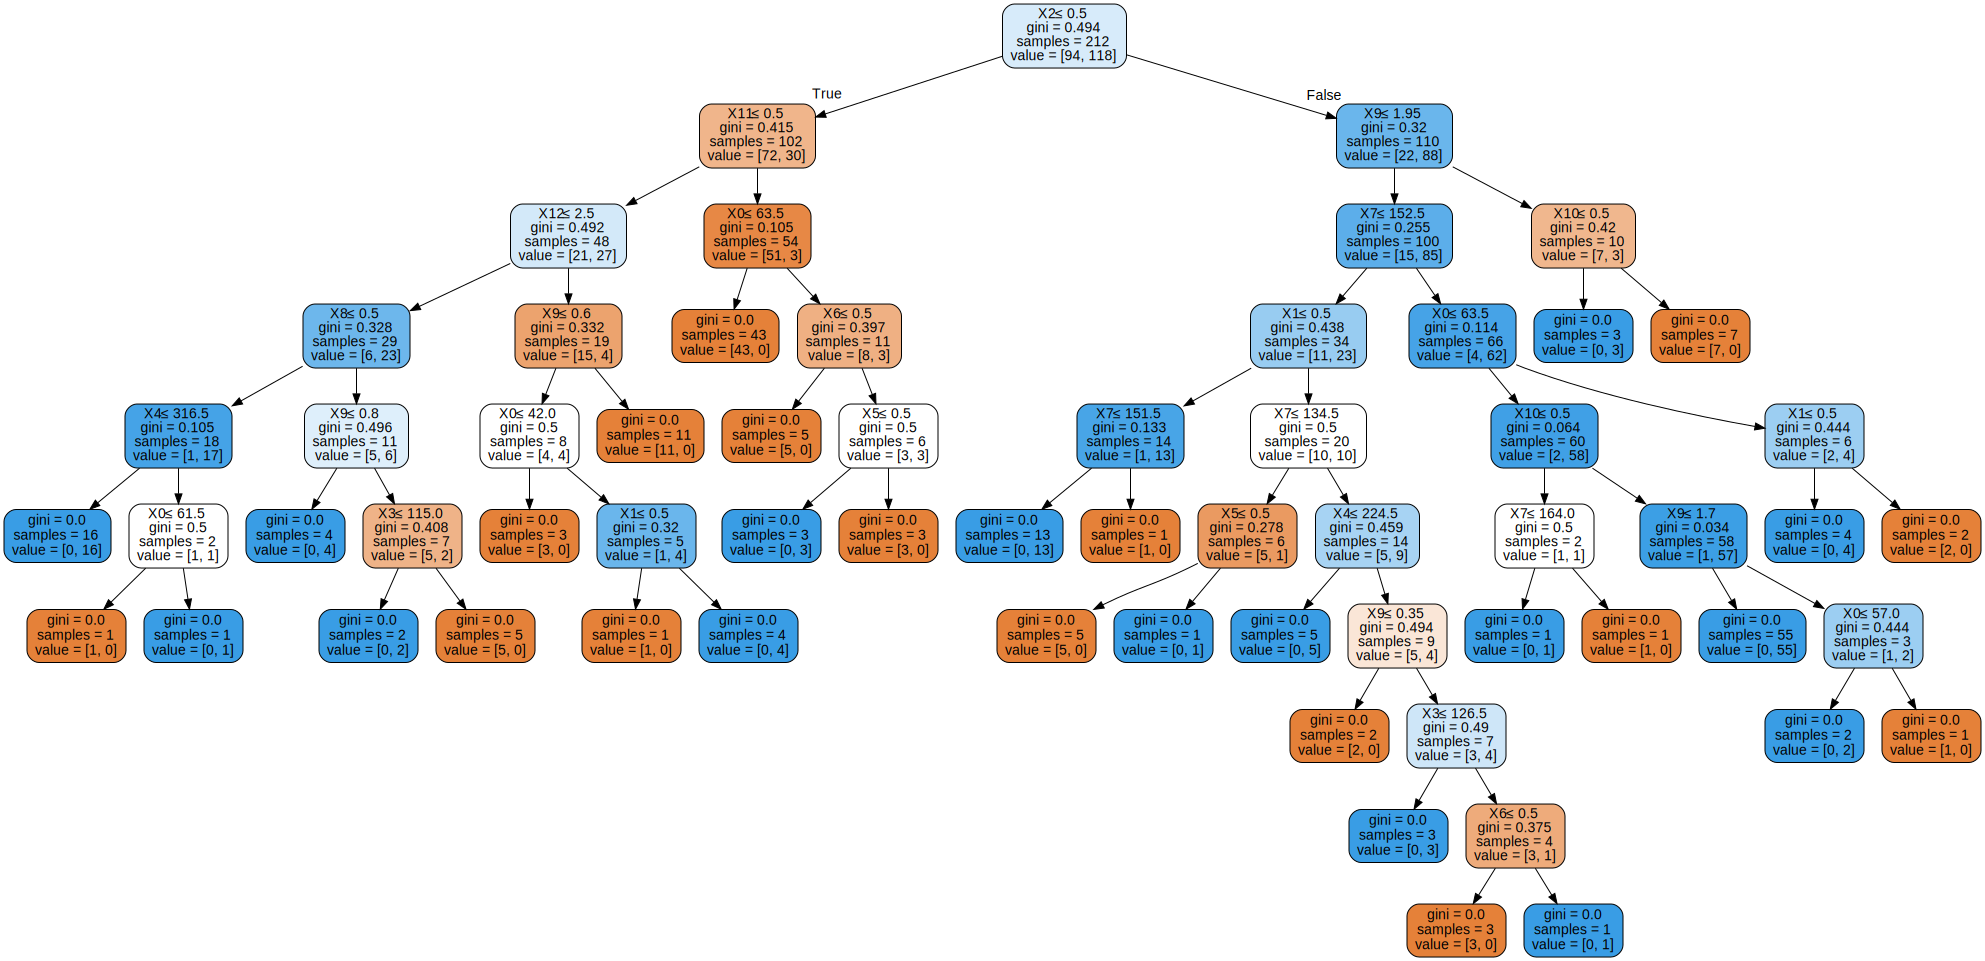

In [0]:
graph = graphviz.Source(dot_data) 

graph


# **E) Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 10,n_estimators = 100)

In [0]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_y_pred = rf.predict(x_test)

In [0]:
rf_accuracy  = accuracy_score(y_test,rf_y_pred)

rf_accuracy

0.8241758241758241

In [0]:
rf_cm = confusion_matrix(y_test,rf_y_pred)

rf_cm

array([[32, 12],
       [ 4, 43]])

In [0]:
estimator = rf.estimators_[5]
dot_data_rf = tree.export_graphviz(estimator, out_file=None,filled=True, rounded=True,special_characters=True) 

rf_graph = graphviz.Source(dot_data_rf) 

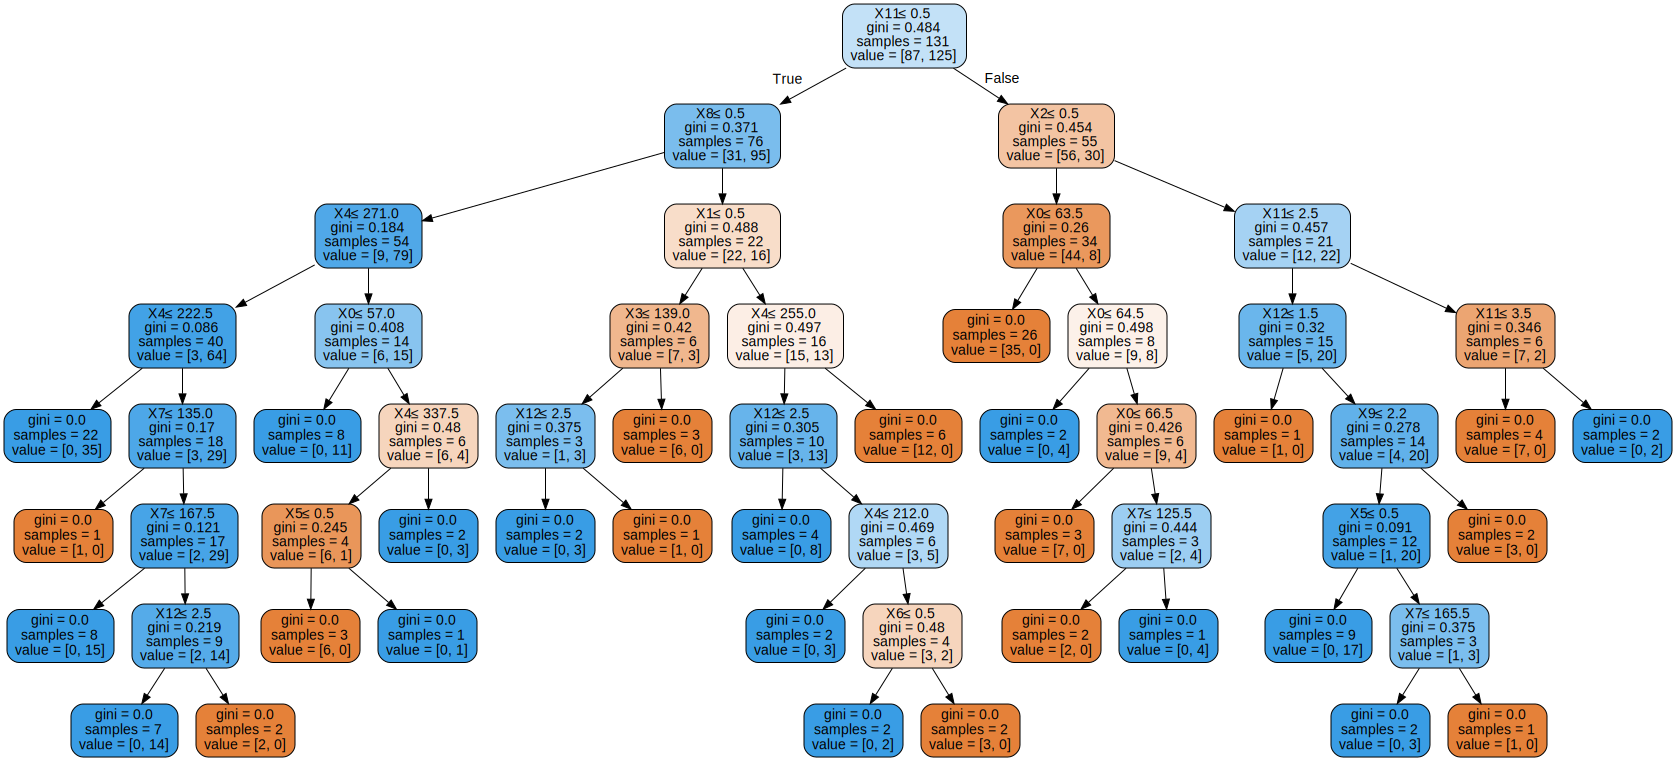

In [0]:
rf_graph

**F) Selecting the best model**

In [0]:
# Confusion Matrix of Logistic Regression Algorithm 

pd.DataFrame(cm)

,0,1
0,32,12
1,5,42


In [0]:
# Confusion Matrix of Decision Tree Algorithm 

pd.DataFrame(cf_dtree)

,0,1
0,32,12
1,13,34


In [0]:
# Confusion Matrix of Random Forest Algorithm 

pd.DataFrame(rf_cm)

,0,1
0,32,12
1,4,43


In [0]:
# Classification reports of all classifiers


from sklearn.metrics import classification_report
target_names = ["Not Having Heart Disease","Having Heart Disease"]

lr_report = classification_report(y_test,y_pred,target_names=target_names)

dtree_report = classification_report(y_test,dtree_y_pred,target_names=target_names)

rf_report = classification_report(y_test,rf_y_pred,target_names=target_names)



In [0]:
print("=====================Classification Report Of Logistic Regression========================\n\n",lr_report)
print("=====================Classification Report Of Decision Tree===============================\n\n",dtree_report)
print("======================Classification Report Of Random Forest===============================\n\n",rf_report)

=====================Classification Report Of Logistic Regression========================

                           precision    recall  f1-score   support

Not Having Heart Disease       0.86      0.73      0.79        44
    Having Heart Disease       0.78      0.89      0.83        47

                accuracy                           0.81        91
               macro avg       0.82      0.81      0.81        91
            weighted avg       0.82      0.81      0.81        91

=====================Classification Report Of Decision Tree===============================

                           precision    recall  f1-score   support

Not Having Heart Disease       0.71      0.73      0.72        44
    Having Heart Disease       0.74      0.72      0.73        47

                accuracy                           0.73        91
               macro avg       0.73      0.73      0.73        91
            weighted avg       0.73      0.73      0.73        91

=================

In [0]:
# Accuracies of all classifiers

print("Logistic Regression Classifier : ",score*100,"%")
print("Decision Tree Classifier : ", dtree_accuracy_score*100,"%")
print("Random Forest Classifier : ",rf_accuracy*100,"%")

Logistic Regression Classifier :  81.31868131868131 %
Decision Tree Classifier :  72.52747252747253 %
Random Forest Classifier :  82.41758241758241 %


Heatmap of Logistic Regression Classifier None


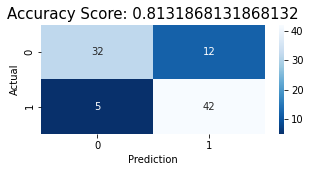

In [0]:
# Heatmaps of all the classifiers

print("Heatmap of Logistic Regression Classifier",print_heatmap(cm,score,figsize=(5,2)))



Decision Tree Classifier None


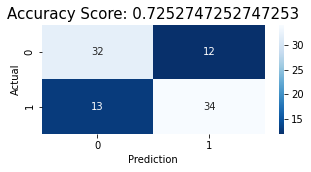

In [0]:
print("Decision Tree Classifier",print_heatmap(cf_dtree,dtree_accuracy_score,figsize=(5,2)))


Random Forest Classifier None


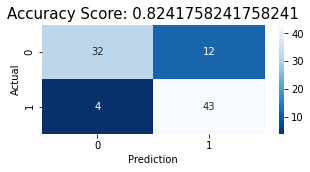

In [0]:
print("Random Forest Classifier",print_heatmap(rf_cm,rf_accuracy,figsize=(5,2)))

In [0]:
# Precision, Recall and F1 Score of all the classifiers

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [0]:
# RECALLS

recall_lr = recall_score(y_test,y_pred)
recall_dtree = recall_score(y_test,dtree_y_pred)
recall_rf = recall_score(y_test,rf_y_pred)

recalls = []
recalls.append(recall_lr)
recalls.append(recall_dtree)
recalls.append(recall_rf)

[0.8936170212765957, 0.723404255319149, 0.9148936170212766]

In [0]:
# PRECISIONS
pre_lr = precision_score(y_test,y_pred)
pre_dtree = precision_score(y_test,dtree_y_pred)
pre_rf = precision_score(y_test,rf_y_pred)

precisions = []
precisions.append(pre_lr)
precisions.append(pre_dtree)
precisions.append(pre_rf)


[0.7777777777777778, 0.7391304347826086, 0.7818181818181819]

In [0]:
#   F1-SCORES 

f1_lr = f1_score(y_test,y_pred)
f1_dtree = f1_score(y_test,dtree_y_pred)
f1_rf = f1_score(y_test,rf_y_pred)

f1s = []

f1s.append(f1_lr)
f1s.append(f1_dtree)
f1s.append(f1_rf)
f1s

[0.8316831683168316, 0.7311827956989247, 0.8431372549019609]

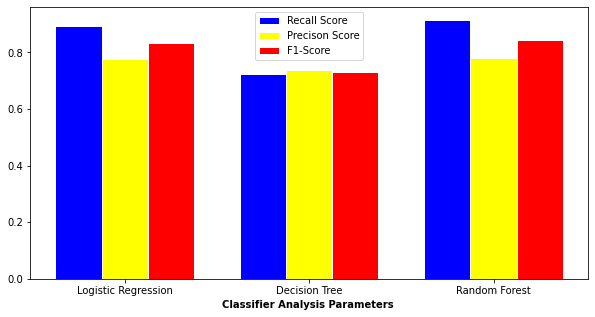

In [0]:
# BAR plot 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
barWidth = 0.25
classifiers = ["Logistic Regression","Decision Tree","Random Forest"]

r1 = np.arange(len(recalls))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, recalls, color='blue', width=barWidth, edgecolor='white', label='Recall Score')
plt.bar(r2, precisions, color='yellow', width=barWidth, edgecolor='white', label='Precison Score')
plt.bar(r3, f1s, color='red', width=barWidth, edgecolor='white', label='F1-Score')

plt.xlabel('Classifier Analysis Parameters ', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(recalls))], classifiers)
 
plt.legend()


plt.show()

**As the accuracy of the random forest classifier is better than the decison tree and the logistic regression hence for this example Random Forest is the Best Classifier**

---



---

